In [19]:
import pandas as pd
import pytz
import datetime as dt
import math
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['path.simplify'] = False
import matplotlib.pyplot as plt

In [20]:
current_timestamp= 1.698218e+09	

In [21]:
current_timestamp

1698218000.0

In [22]:
time_zone = 'Europe/Berlin'
tz = pytz.timezone(time_zone)
local_time = dt.datetime.fromtimestamp(current_timestamp, tz)

In [23]:
local_time

datetime.datetime(2023, 10, 25, 9, 13, 20, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [24]:
time_change = dt.timedelta(minutes=5) 
new_time = local_time + time_change

In [25]:
new_time

datetime.datetime(2023, 10, 25, 9, 18, 20, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [26]:
new_timestamp = dt.datetime.timestamp(new_time)

In [27]:
new_timestamp

1698218300.0

In [28]:
psychopy_file_path = "D:/Datasets/data_sony_digiRelax/pilot_study/VP001_251023/Psychopy_data/VP001_251023_DigiRelax_Experiment_2023-10-25_09h16.01.523.csv"
skin_shimmer_file_path =  "D:/Datasets/data_sony_digiRelax/pilot_study/VP001_251023/Shimmer_data/2023-10-25_07.34.27_VP001_251023_SD_Session1/VP001_251023_Session1_Shimmer_FBA7_Calibrated_SD.csv"
hr_shimmer_file_path = "D:/Datasets\data_sony_digiRelax/pilot_study/VP001_251023/Shimmer_data/2023-10-25_07.34.27_VP001_251023_SD_Session1/VP001_251023_Session1_Shimmer_8108_Calibrated_SD.csv"

In [29]:
#psychopy_file_path = "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/pilot_study/VP002_261023/Psychopy_data/VP002_261023_DigiRelax_Experiment_2023-10-26_10h12.28.142.csv"
#skin_shimmer_file_path =  "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/pilot_study/VP002_261023/Shimmer_data/2023-10-26_08.29.09_VP002_261023_SD_Session1/VP002_261023_Session1_Shimmer_FBA7_Calibrated_SD.csv"
#hr_shimmer_file_path = "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/pilot_study/VP002_261023/Shimmer_data/2023-10-26_08.29.09_VP002_261023_SD_Session1/VP002_261023_Session1_Shimmer_8108_Calibrated_SD.csv"

In [32]:
def read_manipulate_psychopy(psychopy_path):
    
    psychopy_df = pd.read_csv(psychopy_path)
    col_list = [col for col in psychopy_df.columns if col.endswith('_ts')]
    col_list.insert(0, "Reference_time")
    psychopy_df_selected = psychopy_df[col_list]
    
    return psychopy_df_selected    


def read_shimmer_sensor(sensor_file_path):
    
    shimmer_df = pd.read_csv(sensor_file_path, sep='\t', low_memory=False)
    shimmer_df = shimmer_df.reset_index()
    shimmer_df.columns = shimmer_df.iloc[0]
    shimmer_df.drop([0, 1], axis=0, inplace=True)
    shimmer_df=shimmer_df.reset_index(drop=True)
    
    return shimmer_df

def standardize_timestamps_shimmer(shimmer_df, timestamps_col_name):
    
    timesstamps_list = shimmer_df[timestamps_col_name].to_list()
    new_timestamps_list = [float(val)/1000 for val in  timesstamps_list]
    
    shimmer_df[timestamps_col_name] = new_timestamps_list
    
    return shimmer_df

def get_nonNan_list_psychopy(psychopy_df, col_name):
    
    
    selected_vals=[val for val in psychopy_df[col_name].to_list() if not(math.isnan(val))]
    
    return selected_vals


def get_offset_timestamp(timestamp, offset_mins):
    
    time_zone = 'Europe/Berlin'
    tz = pytz.timezone(time_zone)
    local_time = dt.datetime.fromtimestamp(current_timestamp, tz)
    time_change = dt.timedelta(minutes=offset_mins)
    new_time = local_time + time_change
    new_timestamp =  dt.datetime.timestamp(new_time)
    return new_timestamp
    
def slice_df_wrt_timestamps(df, start_timestamp, end_timestamp, timestamps_col= "Shimmer_8108_Timestamp_Unix_CAL"):
    
    sliced_df=df[(df[timestamps_col]>= start_timestamp) & (df[timestamps_col] <= end_timestamp)]
    
    return sliced_df
    
    
    

In [34]:
psychopy_df = read_manipulate_psychopy(psychopy_file_path)

In [35]:
psychopy_df

,Reference_time,sam_e_ts,sam_a_ts,saliva_probe_1_ts,change_room_ts,tsst_prep_ts,tsst_end_ts,tsst_end_exp_ts,saliva_probe_2_ts,saliva_probe_3_ts,saliva_probe_4_ts,final_instruction_ts
0,1.698218e+09,1.698218e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.698218e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.698220e+09,NaN,1.698219e+09,1.698219e+09,1.698219e+09,1.698220e+09,1.698220e+09,NaN,NaN,NaN,NaN
3,NaN,NaN,1.698220e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.698221e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.698220e+09,NaN,NaN,NaN
5,NaN,NaN,1.698221e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.698221e+09,NaN,NaN
7,NaN,1.698222e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,1.698222e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.698222e+09,1.698222e+09


In [67]:
current_event_timestamp = get_nonNan_list_psychopy(psychopy_df, "saliva_probe_1_ts")[0]
print(current_event_timestamp)
time_zone = 'Europe/Berlin'
tz = pytz.timezone(time_zone)
current_time = dt.datetime.fromtimestamp(current_timestamp, tz)
print(current_time)
offset_min = 5
timestamp_offset = get_offset_timestamp(current_event_timestamp, offset_min)
print(timestamp_offset)
offset_time = dt.datetime.fromtimestamp(timestamp_offset)
print(offset_time)




1698218552.8771508
2023-10-25 09:13:20+02:00
1698218300.0
2023-10-25 09:18:20


## Cols of interest for skin resistance = Shimmer_FBA7_Timestamp_Unix_CAL, Shimmer_FBA7_GSR_Skin_Conductance_CAL, Shimmer_FBA7_GSR_Skin_Resistance_CAL

In [68]:
skin_resis_shimmer_df = read_shimmer_sensor(skin_shimmer_file_path)
skin_resis_shimmer_df = standardize_timestamps_shimmer(skin_resis_shimmer_df, "Shimmer_FBA7_Timestamp_Unix_CAL")
skin_col_interest  = ["Shimmer_FBA7_Timestamp_Unix_CAL", "Shimmer_FBA7_GSR_Skin_Resistance_CAL"]
skin_resis_shimmer_df_selected =skin_resis_shimmer_df[skin_col_interest]

In [69]:
skin_resis_shimmer_df_selected

,Shimmer_FBA7_Timestamp_Unix_CAL,Shimmer_FBA7_GSR_Skin_Resistance_CAL
0,1.698218e+09,148.70731707317077
1,1.698218e+09,148.70731707317077
2,1.698218e+09,148.70731707317077
3,1.698218e+09,148.70731707317077
4,1.698218e+09,148.70731707317077
...,...,...
1079534,1.698222e+09,78.71308016877636
1079535,1.698222e+09,78.68146214099215
1079536,1.698222e+09,78.68146214099215
1079537,1.698222e+09,78.64986950411563


In [77]:
time_stamp_sk=1.698218e+09
start_time_sk = dt.datetime.fromtimestamp(time_stamp_sk, tz)
print(start_time_sk)

2023-10-25 09:13:20+02:00


In [74]:
sliced_df_skin=slice_df_wrt_timestamps(skin_resis_shimmer_df_selected, start_timestamp, end_timestamp, timestamps_col= "Shimmer_FBA7_Timestamp_Unix_CAL")

In [75]:
sliced_df_skin

,Shimmer_FBA7_Timestamp_Unix_CAL,Shimmer_FBA7_GSR_Skin_Resistance_CAL


## Cols of interest for ecg = Shimmer_8108_Timestamp_Unix_CAL, Shimmer_8108_ECG_LL-LA_24BIT_CAL	

In [ ]:
skin_shimmer_df = read_shimmer_sensor(skin_shimmer_file_path)
skin_shimmer_df  = standardize_timestamps_shimmer(skin_shimmer_df, "Shimmer_8108_Timestamp_Unix_CAL")


In [ ]:
skin_shimmer_df

In [10]:
hr_shimmer_df = read_shimmer_sensor(hr_shimmer_file_path)
hr_shimmer_df  = standardize_timestamps_shimmer(hr_shimmer_df, "Shimmer_8108_Timestamp_Unix_CAL")
col_interest= ["Shimmer_8108_Timestamp_Unix_CAL", "Shimmer_8108_ECG_LL-LA_24BIT_CAL"]
hr_shimmer_df_selected = hr_shimmer_df[col_interest]

In [11]:
hr_shimmer_df

,Shimmer_8108_Timestamp_Unix_CAL,Shimmer_8108_Accel_LN_X_CAL,Shimmer_8108_Accel_LN_Y_CAL,Shimmer_8108_Accel_LN_Z_CAL,Shimmer_8108_ECG_EMG_Status1_CAL,Shimmer_8108_ECG_EMG_Status2_CAL,Shimmer_8108_ECG_IBI_LA_RA_CAL,Shimmer_8108_ECG_IBI_LL_LA_CAL,Shimmer_8108_ECG_IBI_LL_RA_CAL,Shimmer_8108_ECG_IBI_Vx_RL_CAL,Shimmer_8108_ECG_LA-RA_24BIT_CAL,Shimmer_8108_ECG_LL-LA_24BIT_CAL,Shimmer_8108_ECG_LL-RA_24BIT_CAL,Shimmer_8108_ECG_Vx-RL_24BIT_CAL,Shimmer_8108_ECGtoHR_LA_RA_CAL,Shimmer_8108_ECGtoHR_LL_LA_CAL,Shimmer_8108_ECGtoHR_LL_RA_CAL,Shimmer_8108_ECGtoHR_Vx_RL_CAL,NaN
0,1.698218e+09,-3.0,1.315217391304348,9.42391304347826,128.0,128.0,-1.0,-1.0,-1.0,-1.0,-98.29665938575977,97.72697064005979,-0.5696887456999714,-112.0338102619422,-1.0,-1.0,-1.0,-1.0,NaN
1,1.698218e+09,-2.9891304347826084,1.326086956521739,9.41304347826087,128.0,128.0,-1.0,-1.0,-1.0,-1.0,-98.30769399496246,97.73245188384675,-0.5752421111157073,-112.01700592243743,-1.0,-1.0,-1.0,-1.0,NaN
2,1.698218e+09,-3.010869565217391,1.2934782608695652,9.445652173913043,128.0,128.0,-1.0,-1.0,-1.0,-1.0,-98.29788545344896,97.73375007316471,-0.5641353802842356,-112.0188810847856,-1.0,-1.0,-1.0,-1.0,NaN
3,1.698218e+09,-3.0217391304347827,1.2934782608695652,9.434782608695652,128.0,128.0,-1.0,-1.0,-1.0,-1.0,-98.30178002140285,97.72826882937775,-0.5735111920250884,-112.0212610985352,-1.0,-1.0,-1.0,-1.0,NaN
4,1.698218e+09,-3.010869565217391,1.315217391304348,9.445652173913043,128.0,128.0,-1.0,-1.0,-1.0,-1.0,-98.30480912981143,97.72358092350733,-0.581228206304098,-111.9822432973675,-1.0,-1.0,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078465,1.698222e+09,0.8260869565217391,2.2065217391304346,10.945652173913043,128.0,128.0,-1.0,-1.0,-1.0,-1.0,-105.34611586882066,105.99203717613665,0.6459213073159823,-605.0000721216288,51.717171717171716,51.717171717171716,51.54362416107382,-1.0,NaN
1078466,1.698222e+09,0.8152173913043478,2.2065217391304346,10.945652173913043,128.0,128.0,-1.0,-1.0,-1.0,-1.0,-105.34279827389697,105.99109959496256,0.6483013210655834,-605.0000721216288,51.717171717171716,51.717171717171716,51.54362416107382,-1.0,NaN
1078467,1.698222e+09,0.8152173913043478,2.2282608695652173,10.978260869565217,128.0,128.0,-1.0,-1.0,-1.0,-1.0,-105.34604374719189,105.98778200003888,0.6417382528469865,-605.0000721216288,51.717171717171716,51.717171717171716,51.54362416107382,-1.0,NaN
1078468,1.698222e+09,0.8369565217391304,2.217391304347826,10.967391304347826,128.0,128.0,-1.0,-1.0,-1.0,-1.0,-105.34633223370699,105.99679720363585,0.6504649699288572,-605.0000721216288,51.717171717171716,51.717171717171716,51.54362416107382,-1.0,NaN


In [12]:
events_list = ["Reference_time", "saliva_probe_1_ts", "change_room_ts", "tsst_prep_ts", "tsst_end_ts", "tsst_end_exp_ts", "saliva_probe_2_ts", "saliva_probe_3_ts","saliva_probe_4_ts"]


hr_all_events_list=[]
timestamps_all_events_list = []
corr_event_list = []



for ind, event in enumerate(events_list):
    
    if ind ==0:
        
        last_event = event
        last_event_timestamp = get_nonNan_list_psychopy(psychopy_df, last_event)[0]
    else:
        current_event = event
        
        current_event_timestamp = get_nonNan_list_psychopy(psychopy_df, current_event)[0]
        
        hr_start_change_roonm_df=hr_shimmer_df_selected[(hr_shimmer_df_selected["Shimmer_8108_Timestamp_Unix_CAL"]>= last_event_timestamp) & (hr_shimmer_df_selected["Shimmer_8108_Timestamp_Unix_CAL"] <= current_event_timestamp)]
        
        hr_list=hr_start_change_roonm_df[col_interest[1]].values
        
        hr_list =[float(val) for val in hr_list]
        
        ts_list = hr_shimmer_df_selected["Shimmer_8108_Timestamp_Unix_CAL"].values
        
        
        hr_all_events_list.append(hr_list)
        timestamps_all_events_list.append(ts_list)
        corr_event_list.append(event)
        
        last_event = event
        last_event_timestamp = get_nonNan_list_psychopy(psychopy_df, last_event)[0]
        

    



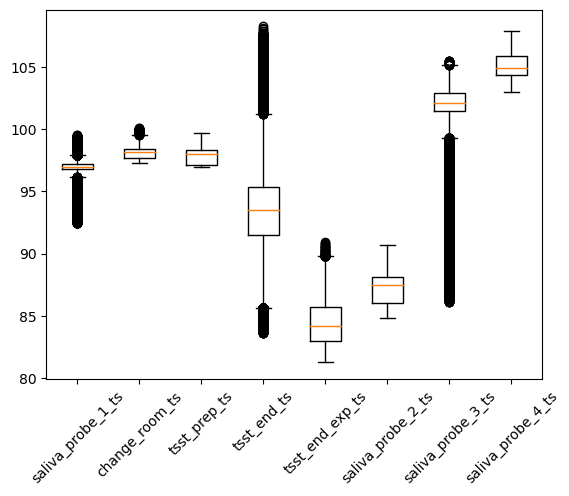

In [16]:
plt.boxplot(hr_all_events_list)
plt.xticks([1,2,3,4,5,6,7,8], corr_event_list)
plt.xticks(rotation = 45)
plt.show()


[]